In [1]:
# Computes Nino34.index for CESM ensemble members

## Utilizes code provided by Ryan Abernathey via https://hub.gke.mybinder.org/user/pangeo-data-ope-urce-geoscience-kmam65fc/lab


In [2]:
matplotlib inline

In [3]:
import numpy as np

In [4]:
from scipy.signal import detrend

In [5]:
from matplotlib import pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Use intake_esm to access glade-cmip6-ESM Collection with all available entries

In [7]:
import intake

import util

if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
# col

In [8]:
# col.df.head()

In [9]:
import pprint 
# uni_dict = col.unique(['source_id', 'experiment_id', 'table_id','variable_id'])
# pprint.pprint(uni_dict, compact=True)

In [10]:
# cat = col.search(experiment_id=['historical'], variable_id='ts', grid_label='gn',institution_id='NCAR',source_id='CESM2',table_id='Amon',time_range='185001-201412')
cat = col.search(experiment_id=['historical'], variable_id='ts', grid_label='gn',institution_id='NCAR',source_id='CESM2',table_id='Amon')
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
87842,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,ts,gn,NaN,v20190308,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
90273,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,ts,gn,NaN,v20190308,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
92508,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,ts,gn,NaN,v20190308,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
94743,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,ts,gn,NaN,v20190308,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
96978,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,ts,gn,NaN,v20190308,185001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
101585,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,ts,gn,NaN,v20190311,200001-201412,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
101586,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,ts,gn,NaN,v20190311,190001-194912,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
101587,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,ts,gn,NaN,v20190311,195001-199912,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
101588,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,ts,gn,NaN,v20190311,185001-189912,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...
106551,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,ts,gn,NaN,v20190311,190001-194912,/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/...


In [11]:
# Loading data

In [12]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={'chunks': {}})


xarray will load netCDF datasets with dask using a single chunk for all arrays.
For effective chunking, please provide chunks in cdf_kwargs.
For example: cdf_kwargs={'chunks': {'time': 36}}

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 1 group(s)


In [13]:
dset_dict.keys()

dict_keys(['CMIP.NCAR.CESM2.historical.Amon.gn'])

In [14]:
ds = dset_dict['CMIP.NCAR.CESM2.historical.Amon.gn']

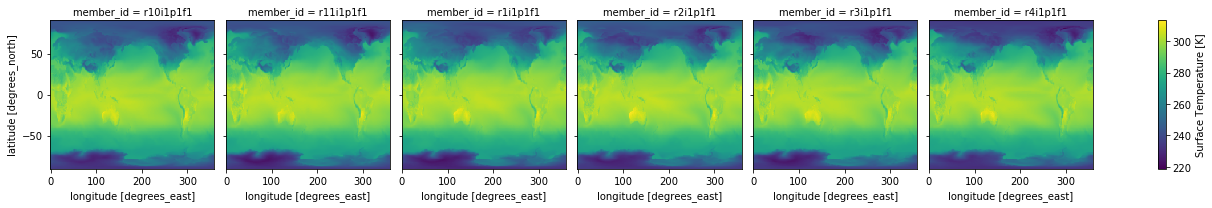

In [15]:
ds.ts.isel(time=1, member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

# Calculate Climatology and Monthly Anomaly


In [16]:
sst_clim = ds.ts.groupby('time.month').mean(dim='time')


In [17]:
sst_anom = ds.ts.groupby('time.month') - sst_clim

In [18]:
sst_anom

<xarray.DataArray 'ts' (member_id: 11, time: 1980, lat: 192, lon: 288)>
dask.array<transpose, shape=(11, 1980, 192, 288), dtype=float32, chunksize=(1, 1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

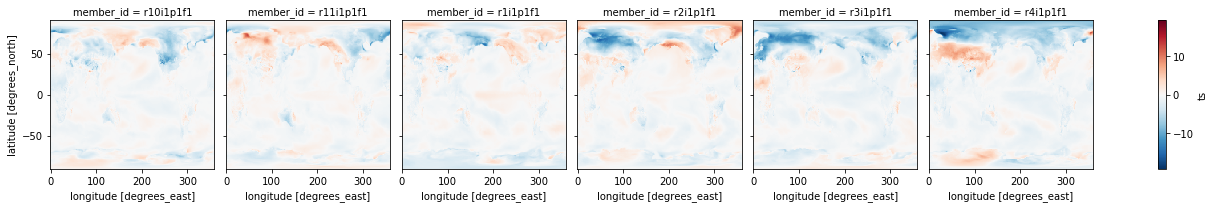

In [19]:
sst_anom.isel(time=1, member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

In [ ]:
from scipy.signal import detrend
# sst_anom_detrended = xr.apply_ufunc(detrend, sst_anom, kwargs={'axis': 0})\.where(sst_anom.notnull())

In [20]:
weights = np.cos(np.deg2rad(ds.lat)).where(~sst_anom[0].isnull())

In [21]:
weights /= weights.mean()

In [22]:
sst_anom_weighted = sst_anom * weights

In [23]:
# sst_anom.isel(time=1, member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

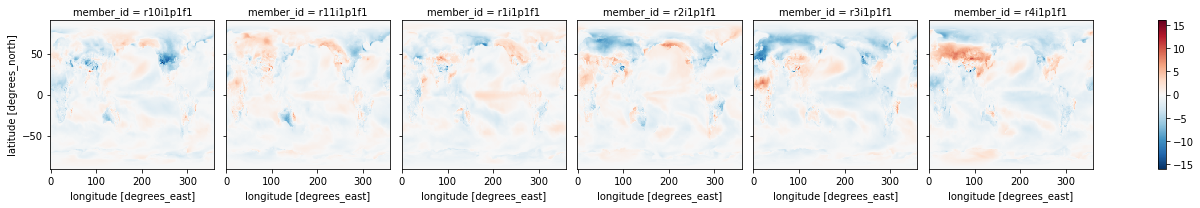

In [24]:
sst_anom_weighted.isel(time=1, member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

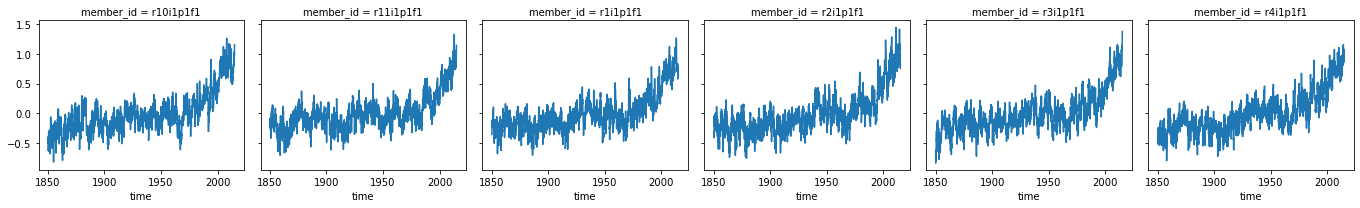

In [25]:
sst_anom_weighted.isel(member_id=[0, 1, 2, 3, 4, 5]).mean(dim=['lat','lon']).plot(col="member_id")

# Calculate nino34-index
## Nino3.4 region( 5∘ N- 5∘ N and  170∘ E- 120∘ W)

In [26]:
sst_anom_nino34 = sst_anom_weighted.sel(lat=slice(-5, 5), lon=slice(190, 240))

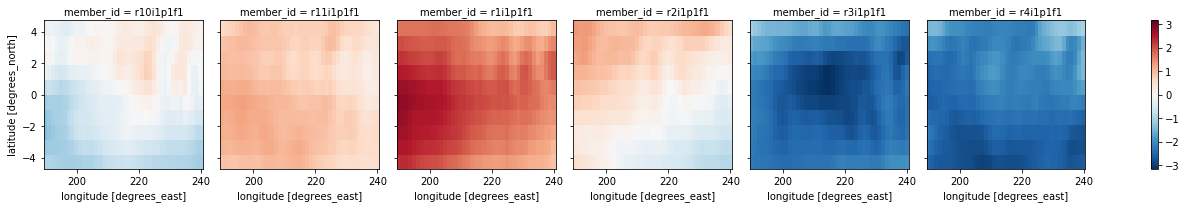

In [27]:
sst_anom_nino34.isel(time=1, member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

In [28]:
sst_anom_nino34_mean = sst_anom_nino34.mean(dim=('lon', 'lat'))

In [29]:
nino34 = sst_anom_nino34_mean.rolling(time=3, center=True).mean().dropna('time')
# will produce NaNs
# nino34=sst_anom_nino34_mean

In [30]:
# nino34.values

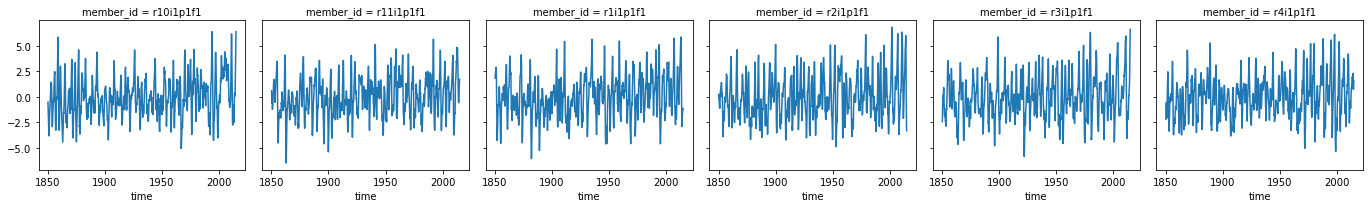

In [31]:
nino34.isel(member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

In [32]:
from scipy import signal

In [33]:
a=nino34.isel(member_id=[0]).squeeze()


In [34]:
f, Pxx_den = signal.welch(a, 1, window='hanning')


In [35]:
f, Pxx_den = signal.welch(nino34,1, window='hanning')

In [36]:
Pxx_den.shape, f.shape
Pxx_den.shape[1]

129

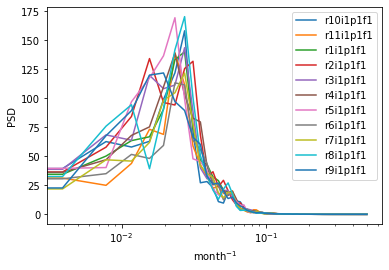

In [37]:
for i in range(nino34.member_id.size):
   plt.semilogx(f, Pxx_den[i], label=nino34.member_id.values[i])
#plt.ylim([0.5e-3, 1])
plt.xlabel('month$^{-1}$')
plt.ylabel('PSD')
plt.legend()
plt.show()

# Compute global EOFs for al members

In [38]:
sst_anom_transpose=sst_anom.transpose('time','lat','lon','member_id')
sst_anom_transpose

<xarray.DataArray 'ts' (time: 1980, lat: 192, lon: 288, member_id: 11)>
dask.array<transpose, shape=(1980, 192, 288, 11), dtype=float32, chunksize=(1, 192, 288, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * member_id  (member_id) <U9 'r10i1p1f1' 'r11i1p1f1' ... 'r8i1p1f1' 'r9i1p1f1'
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [2]:
a=sst_anom_transpose.isel(time=slice(1,50),member_id=1)
a

NameError: name 'sst_anom_transpose' is not defined

In [1]:
from eofs.xarray import Eof
solver = Eof(a) #, weights=np.sqrt(weights))

NameError: name 'a' is not defined

In [ ]:
eof1 = solver.eofsAsCorrelation(neofs=1)


In [ ]:
pc1 = solver.pcs(npcs=1, pcscaling=1)

In [ ]:
nino34.isel(member_id=[0, 1, 2, 3, 4, 5]).plot(col="member_id")

In [ ]:
eof1.sel(mode=0).plot()
pc1.sel(mode=0).plot()
plt.grid()